In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Load data
emails_df = pd.read_csv("spam_ham_dataset.csv")

# Removing Unnecessary column
emails_df.drop("Unnamed: 0", axis=1, inplace=True)
# Changing column names
emails_df.columns = ["label", "text", "class"]

In [ ]:
emails_df.shape

(5171, 3)

In [ ]:
emails_df.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
emails_df.groupby("label").size()

label
ham     3672
spam    1499
dtype: int64

In [ ]:
classes = ["Ham", "Spam"]

Text(0.5, 1.0, 'Examples per Class')

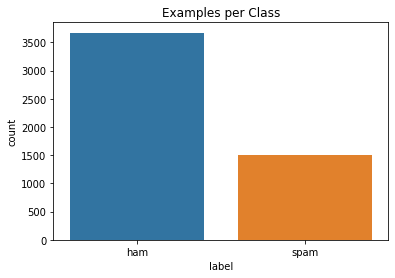

In [ ]:
# Barplot describes the count of the class labels
sns.countplot(data=emails_df, x="label")
plt.title("Examples per Class")

Text(0.5, 1.0, 'Email Length Per Class')

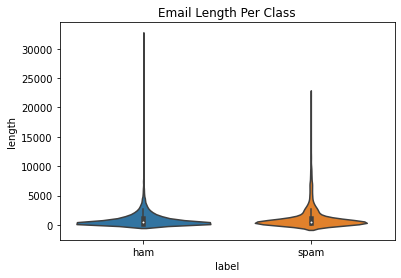

In [ ]:
# Calculate Length of Emails
emails_df["length"] = emails_df["text"].apply(len)

# Violin Plot
sns.violinplot(x="label", y="length", data=emails_df)
plt.title("Email Length Per Class")

Text(0.5, 1.0, 'Email Length Per Class (less than 5000 characters)')

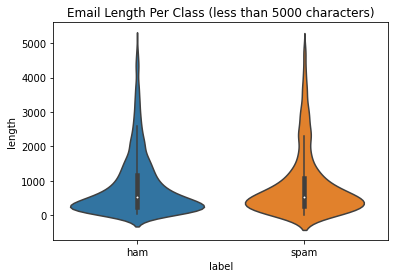

In [ ]:
# Focus on less than 5000 characters emails
# Violin Plot
sns.violinplot(x="label", y="length", data=emails_df[emails_df["length"] < 5000])
plt.title("Email Length Per Class (less than 5000 characters)")

Text(0.5, 1.0, 'Email word count per class (emails with less than 5000 characters)')

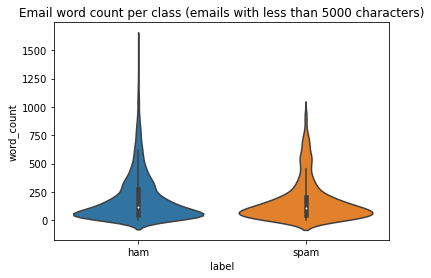

In [ ]:
# Word Count
emails_df["word_count"] = emails_df["text"].str.split().str.len()

# Violin Plot
sns.violinplot(x="label", y="word_count", data=emails_df[emails_df["length"] < 5000])
plt.title("Email word count per class (emails with less than 5000 characters)")

In [ ]:
# 20 Most Common Words
words_counter = collections.Counter(" ".join(emails_df["text"]).split())
words, frequency = zip(*words_counter.most_common(20))

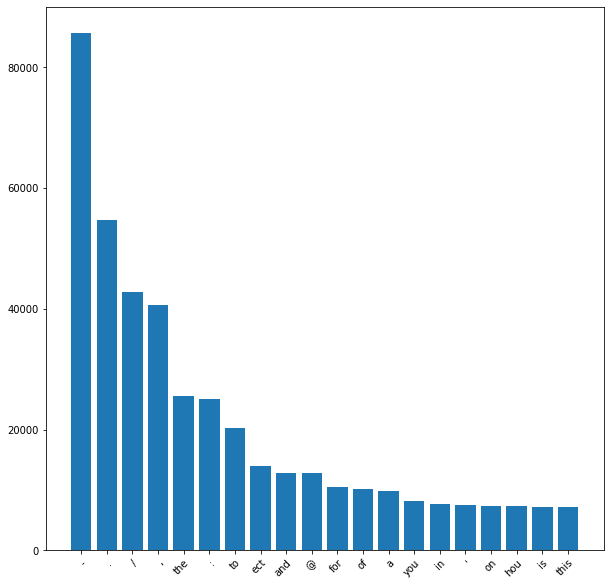

In [ ]:
ax = plt.figure(figsize=(10, 10)).gca()
ax.bar(words, frequency)
ax.set_xticklabels(words, rotation=45, rotation_mode="anchor", ha="right")
plt.show()

In [ ]:
import re
import string

In [ ]:
# Cleaning the corpus (including word "subject")
def clean_text(text):
    '''
    Makes text lowercase for better comparison.
    Removes punctuation, trailing characters, text between
    square brackets, words containing numbers and links.
    Also removes the word subject (part of emails structure)
    '''
    text = str(text).lower()
    text = re.sub("\[.*?\']", '', text)
    text = re.sub("https?://\S+|www\.\S+", '', text)
    text = re.sub("<.*?>+", '', text)
    text = re.sub("[%s]" % re.escape(string.punctuation), '', text)
    text = re.sub("\n", ' ', text)
    text = re.sub("\w*\d\w*", '', text)
    text = re.sub("subject", '', text)
    text = re.sub("\\r", ' ', text)
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    for p in punct:
        text = text.replace(p, '')
    return text

In [ ]:
emails_df["text_clean"] = emails_df["text"].apply(clean_text)

In [ ]:
# 20 Most Common Words in Clean Text
words_counter = collections.Counter(" ".join(emails_df["text_clean"]).split())
words, frequency = zip(*words_counter.most_common(20))

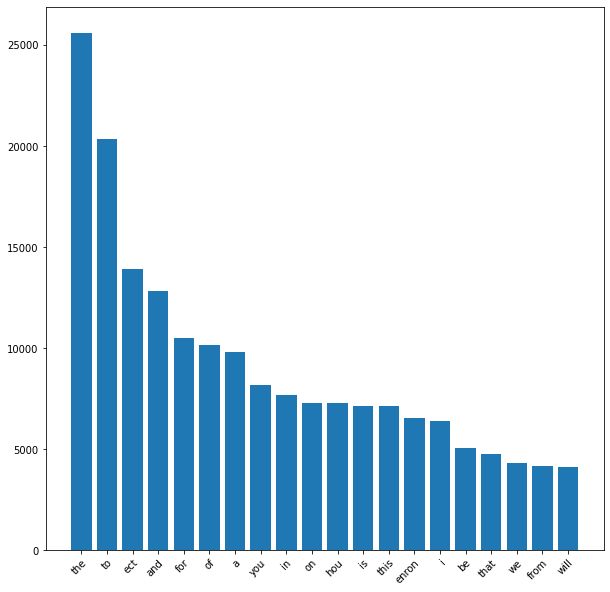

In [ ]:
ax = plt.figure(figsize=(10, 10)).gca()
ax.bar(words, frequency)
ax.set_xticklabels(words, rotation=45, rotation_mode="anchor", ha="right")
plt.show()

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stemmer = nltk.stem.snowball.EnglishStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Stop Words
stop_words = set(nltk.corpus.stopwords.words("english"))

In [ ]:
# Bag Of Words
words_ham_raw  = ''.join(str(emails_df[emails_df["label"] == "ham"]["text_clean"].tolist()))
words_spam_raw = ''.join(str(emails_df[emails_df["label"] == "spam"]["text_clean"].tolist()))
words_all_raw = ''.join(str(emails_df["text_clean"].tolist()))

In [ ]:
def process_words(
    text,
    stop_words=stop_words,
    stemmer = stemmer,
    lemmatizer = lemmatizer):
    
    words = nltk.tokenize.word_tokenize(text)
       
    filtered_words_pre = []
    filtered_words_post = []
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            filtered_words_pre.append(word)
            word = stemmer.stem(word)
            filtered_words_post.append(lemmatizer.lemmatize(word))
    
    return filtered_words_pre, filtered_words_post

In [ ]:
words_ham_pre,  words_ham  = process_words(words_ham_raw)
words_spam_pre, words_spam = process_words(words_spam_raw)
words_all_pre,  words_all  = process_words(words_all_raw)

In [ ]:
print("Raw Corpus (Ham):", len(words_ham_raw))
print("Processed Corpus (Ham):", len(words_ham), "(~{:d}%)".format(int(len(words_ham) / len(words_ham_raw) * 100)))
print("Raw Corpus (Spam):", len(words_spam_raw))
print("Processed Corpus (Spam):", len(words_spam), "(~{:d}%)".format(int(len(words_spam) / len(words_spam_raw) * 100)))

Raw Corpus (Ham): 3133632
Processed Corpus (Ham): 317496 (~10%)
Raw Corpus (Spam): 1712737
Processed Corpus (Spam): 177780 (~10%)


In [ ]:
# N-grams (All words)
bigrams_series_all = (pd.Series(nltk.ngrams(words_all, 2)).value_counts())[:10]
trigrams_series_all = (pd.Series(nltk.ngrams(words_all, 3)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

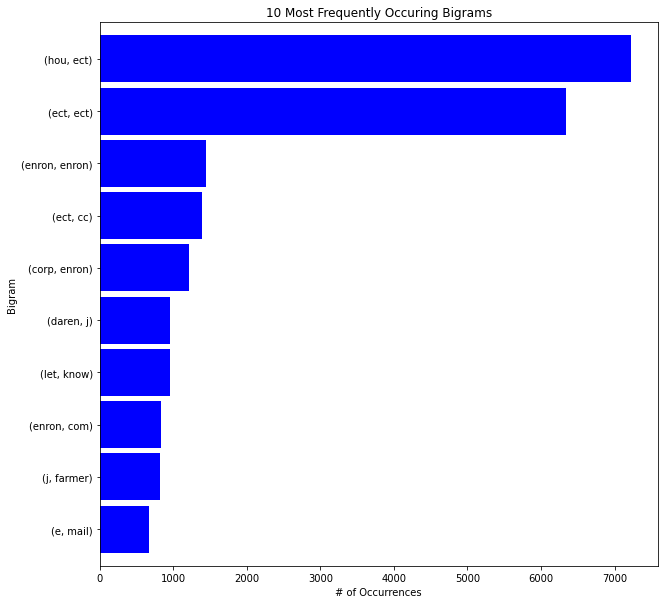

In [ ]:
# Bigram Plot (all)
bigrams_series_all.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

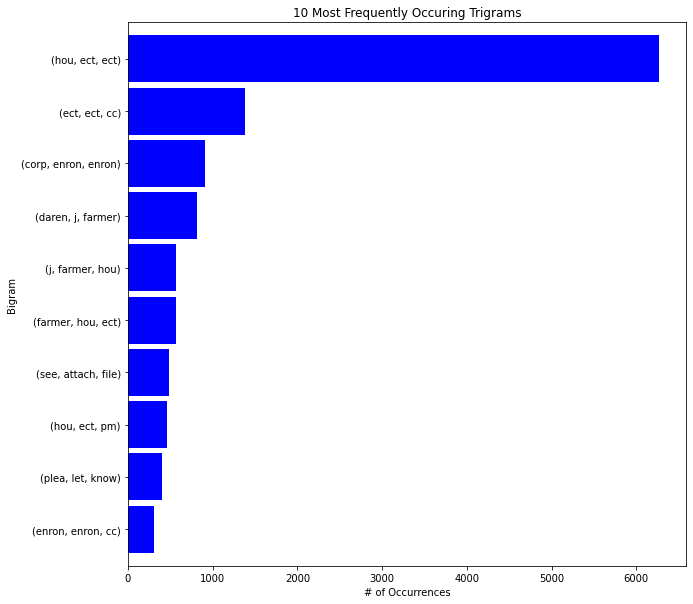

In [ ]:
# Trigram Plot (all)
trigrams_series_all.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [ ]:
# N-grams (Ham)
bigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 2)).value_counts())[:10]
trigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 3)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

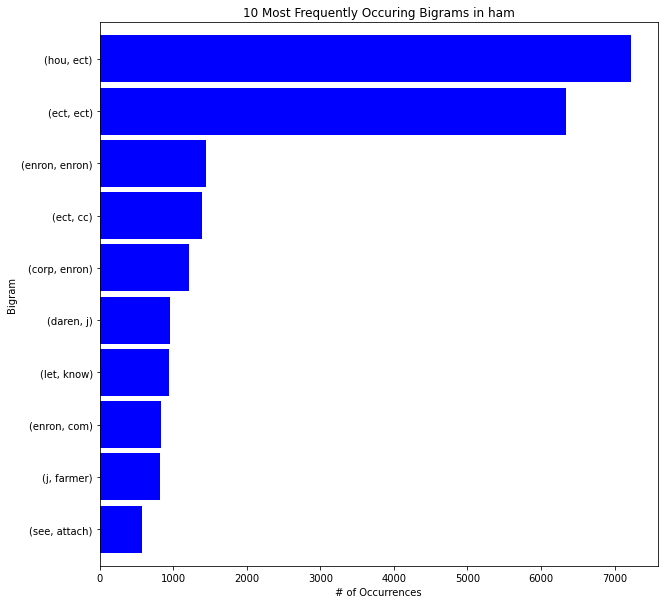

In [ ]:
# Ham Bigram Plot
bigrams_series_ham.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Bigrams in ham')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

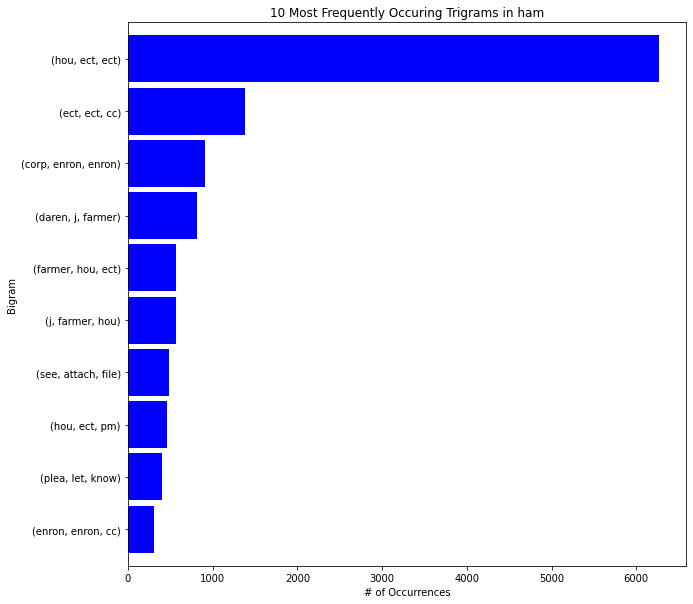

In [ ]:
# Ham Trigram Plot
trigrams_series_ham.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Trigrams in ham')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [ ]:
# N-grams (Spam)
bigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 2)).value_counts())[:10]
trigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 3)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

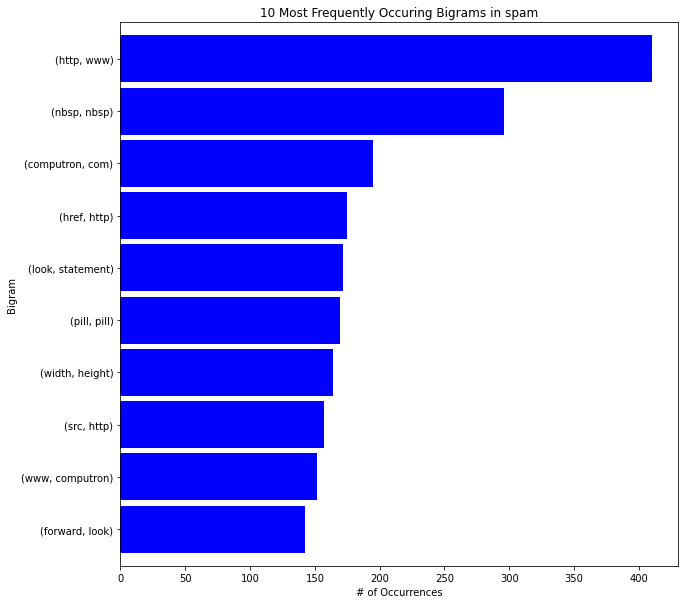

In [ ]:
bigrams_series_spam.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Bigrams in spam')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

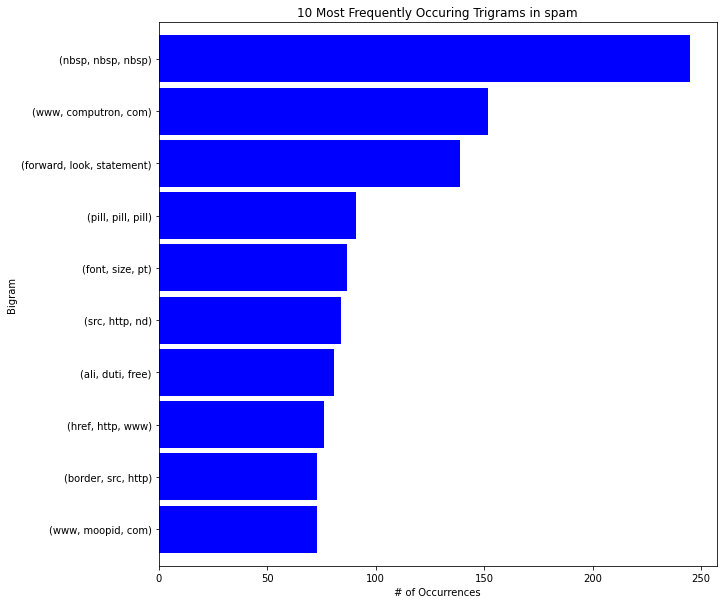

In [ ]:
trigrams_series_spam.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('10 Most Frequently Occuring Trigrams in spam')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [ ]:
import wordcloud

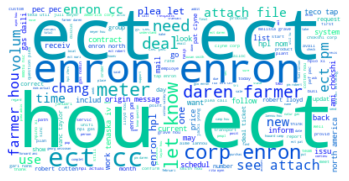

In [ ]:
word_cloud = wordcloud.WordCloud(background_color="white", colormap="winter")
word_cloud.generate(",".join(words_ham))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

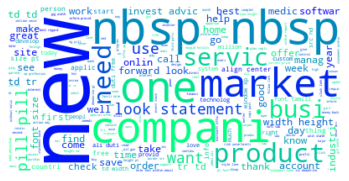

In [ ]:
word_cloud = wordcloud.WordCloud(background_color="white", colormap="winter")
word_cloud.generate(",".join(words_spam))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Word2Vec Representation
from gensim import downloader

In [ ]:
w2v = downloader.load("word2vec-google-news-300")

In [ ]:
# One example of a vector (showing only 5 first features)
index = 5

print(words_ham_pre[index])
print(w2v[words_ham_pre[index]][:5])
print(words_spam_pre[index])
print(w2v[words_spam_pre[index]][:5])

gave
[ 0.22265625 -0.01660156  0.13476562 -0.13378906  0.1953125 ]
trending
[-0.10693359 -0.1015625  -0.265625   -0.0246582  -0.24414062]


In [ ]:
math_weaker = w2v["stronger"] - w2v["strong"] + w2v["weak"]

In [ ]:
np.linalg.norm(math_weaker - w2v["weaker"])

1.936865

In [ ]:
np.linalg.norm(w2v["person"] - w2v["animal"])

3.2777858

In [ ]:
w2v.most_similar("king")

[('kings', 0.7138046026229858),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864822864532471),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.543294370174408),
 ('throne', 0.5422104597091675)]

In [ ]:
# GloVe Representation
glove = {}
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        glove[word] = vector

# Another way (memory intensive)
# glove = downloader.load("glove-wiki-gigaword-50")

In [ ]:
math_weaker = glove["stronger"] - glove["strong"] + glove["weak"]

In [ ]:
np.linalg.norm(math_weaker - glove["weaker"])

2.535143

In [ ]:
np.linalg.norm(glove["strong"] - glove["weak"])

3.0656097

In [ ]:
# Visualization for word2vec
vectors_ham = []

for word in set(words_ham_pre):
    if word in w2v.vocab:
        vectors_ham.append(w2v[word])

vectors_spam = []

for word in set(words_spam_pre):
    if word in w2v.vocab:
        vectors_spam.append(w2v[word])      

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# PCA Calculation (3 components)
pca = PCA(n_components=3)

pca_df = pd.DataFrame(columns=["x", "y", "z", "class"])

pca_result = pca.fit_transform(vectors_ham)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 0
    })

pca_df = pca_df.append(new_df, ignore_index=True)

pca_result = pca.fit_transform(vectors_spam)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 1
    })

pca_df = pca_df.append(new_df, ignore_index=True)

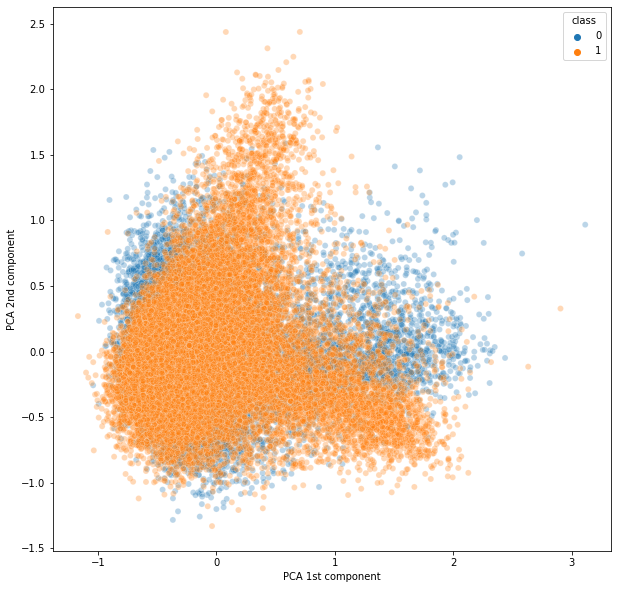

In [ ]:
# PCA 2D Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = pca_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("PCA 1st component")
plt.ylabel("PCA 2nd component")

plt.show()

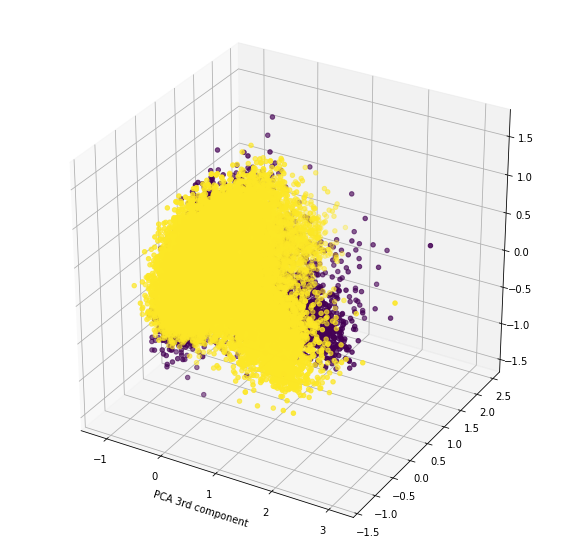

In [ ]:
# PCA 3D Plot
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')

ax.scatter(
    xs=pca_df["x"],
    ys=pca_df["y"],
    zs=pca_df["z"],
    c=pca_df["class"]
)

# Modify Legend and Labels
ax.set_xlabel("PCA 1st component")
ax.set_xlabel("PCA 2nd component")
ax.set_xlabel("PCA 3rd component")

plt.show()

In [ ]:
# t-SNE
pca = PCA(n_components=50)
pca = pca.fit(vectors_ham[:1000])
pca = pca.fit(vectors_spam[:1000])

tsne_df = pd.DataFrame(columns=["x", "y", "z", "class"])

tsne = TSNE(n_components=3)

In [ ]:
pca_result = pca.transform(vectors_ham[:1000])

tsne_result = tsne.fit_transform(pca_result)

In [ ]:
new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": 0
    })
tsne_df = tsne_df.append(new_df, ignore_index=True)

In [ ]:
pca_result = pca.transform(vectors_spam[:1000])

tsne_result = tsne.fit_transform(pca_result)

In [ ]:
new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": 1
    })
tsne_df = tsne_df.append(new_df, ignore_index=True)

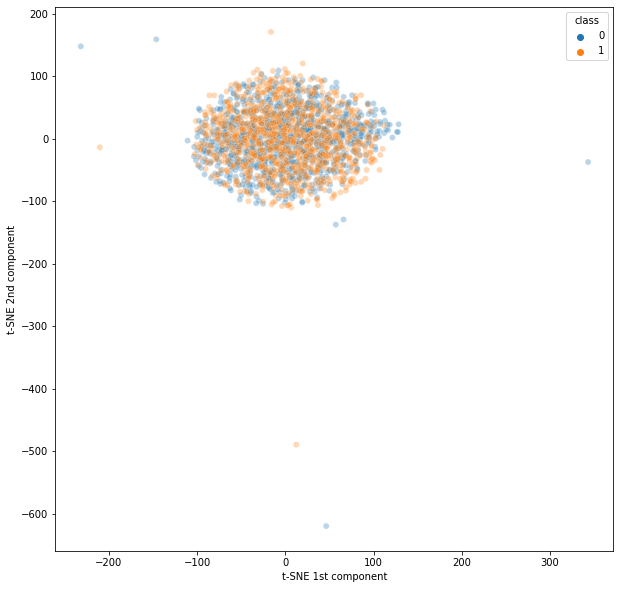

In [ ]:
# t-SNE Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = tsne_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("t-SNE 1st component")
plt.ylabel("t-SNE 2nd component")

plt.show()

In [ ]:
# Visualization for GloVe
vectors_ham = []

for word in set(words_ham_pre):
    if word in glove:
        vectors_ham.append(glove[word])

vectors_spam = []

for word in set(words_spam_pre):
    if word in glove:
        vectors_spam.append(glove[word])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# PCA Calculation (3 components)
pca = PCA(n_components=3)

pca_df = pd.DataFrame(columns=["x", "y", "z", "class"])

pca_result = pca.fit_transform(vectors_ham)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 0
    })

pca_df = pca_df.append(new_df, ignore_index=True)

pca_result = pca.fit_transform(vectors_spam)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": 1
    })

pca_df = pca_df.append(new_df, ignore_index=True)

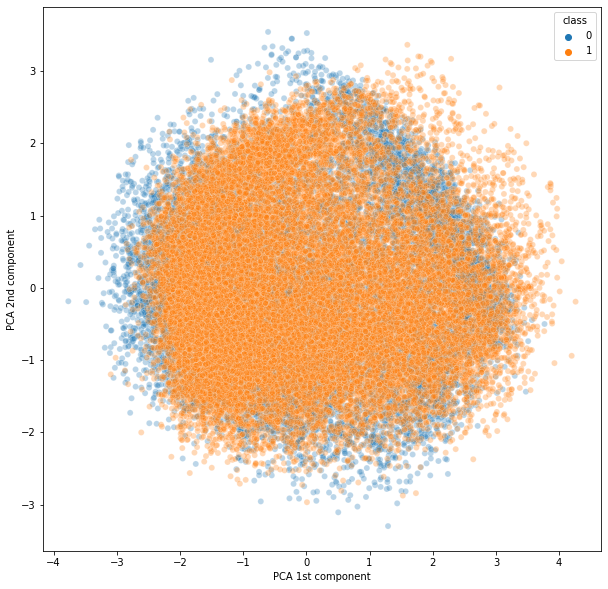

In [ ]:
# PCA 2D Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = pca_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("PCA 1st component")
plt.ylabel("PCA 2nd component")

plt.show()

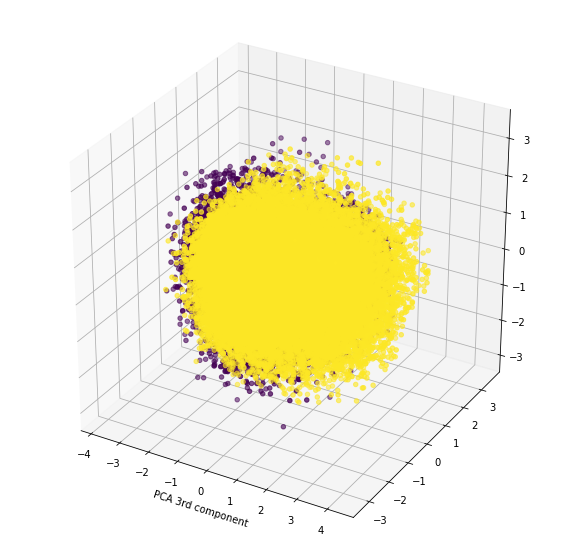

In [ ]:
# PCA 3D Plot
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')

ax.scatter(
    xs=pca_df["x"],
    ys=pca_df["y"],
    zs=pca_df["z"],
    c=pca_df["class"]
)

# Modify Legend and Labels
ax.set_xlabel("PCA 1st component")
ax.set_xlabel("PCA 2nd component")
ax.set_xlabel("PCA 3rd component")

plt.show()

In [ ]:
# t-SNE for GloVe (already 50 features, no need to PCA)
tsne_df = pd.DataFrame(columns=["x", "y", "z", "class"])

tsne = TSNE(n_components=3)

In [ ]:
vectors_all = vectors_ham[:1000] + vectors_spam[:1000]

In [ ]:
tsne_result = tsne.fit_transform(vectors_all)

In [ ]:
new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": zeros_like(1, 1000) + ones_like(1, 1000)
    })
tsne_df = tsne_df.append(new_df, ignore_index=True)

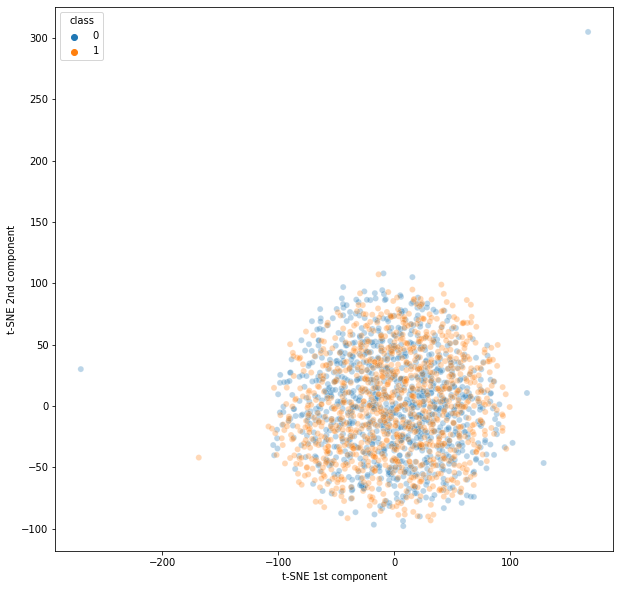

In [ ]:
# t-SNE Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = tsne_df,
    x = "x",
    y = "y",
    hue = "class",
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.xlabel("t-SNE 1st component")
plt.ylabel("t-SNE 2nd component")

plt.show()